In [156]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# import libraries 
import pandas as pd # data manipulation in dataframes
import numpy as np # statistical analysis 
import matplotlib.pyplot as plt # data visualisation
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split # to split train data into train and validation
import itertools
import random
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard



%matplotlib inline
sns.set_style("whitegrid")

from tqdm import tqdm

In [21]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('../data/raw/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('../data/raw/fashion-mnist_test.csv', sep = ',')

In [22]:
# converting the dataframes into numpy array for ease of ploting the image and passing into the models

train_labels = fashion_train_df.iloc[:, 0].to_numpy()
train_features = fashion_train_df.iloc[:, 1:].to_numpy()
test_labels = fashion_test_df.iloc[:, 0].to_numpy()
test_features = fashion_test_df.iloc[:, 1:].to_numpy()

In [24]:
# spliting train data into train and validation

train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=10000, random_state=42)

In [25]:
# shape and head of train data
print(train_features.shape)
# print(fashion_train_df.head())

(50000, 784)


In [26]:
# shape and head of validation data
print(val_features.shape)
# print(fashion_val_df.head())

(10000, 784)


In [27]:
# shape and head of test data
print(test_features.shape)
# print(fashion_test_df.head())

(10000, 784)


In [28]:
# Data labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Bag')

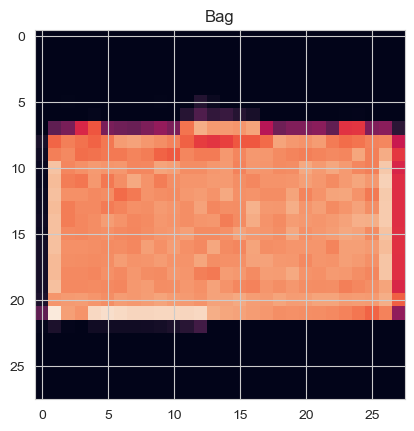

In [30]:
# Viewing an image

i = random.randint(1,50000)
plt.imshow(train_features[i,:].reshape((28,28)))
label_index = train_labels[i]
plt.title(f"{labels[label_index]}")


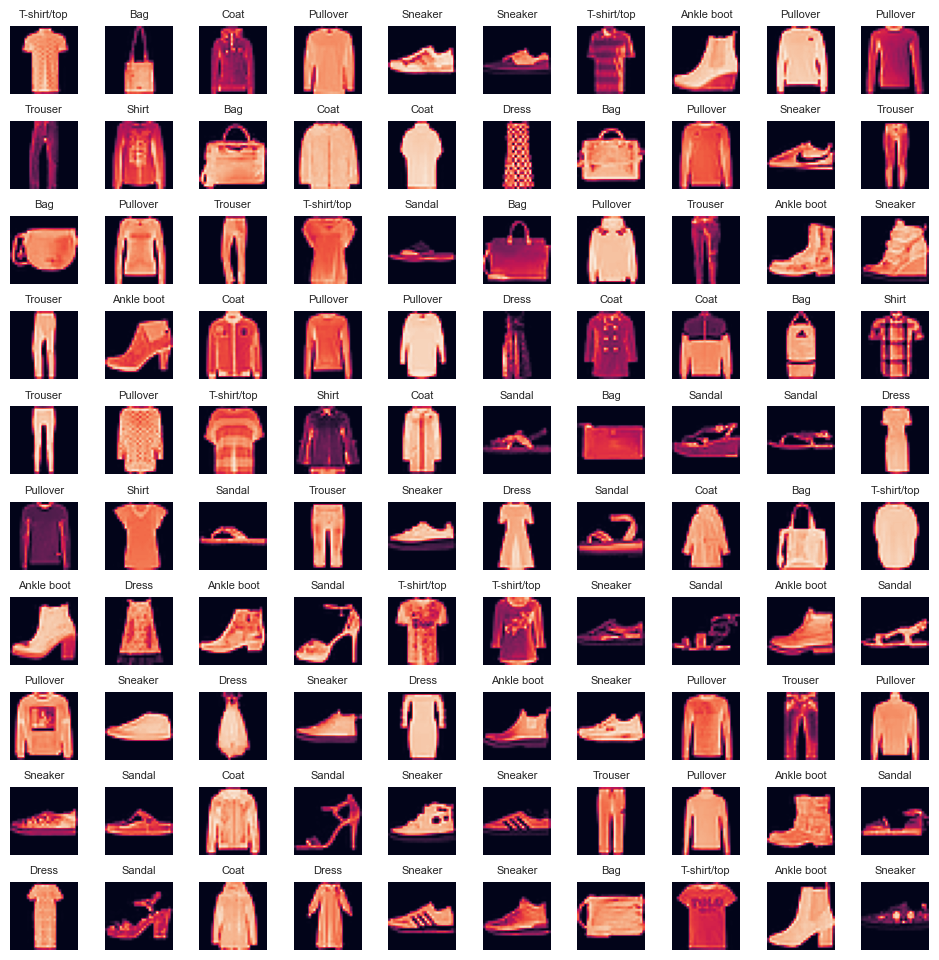

In [31]:
fig, axes = plt.subplots(10, 10, figsize=(12,12)) # Length and Width of plot
axes = axes.ravel()
for i in np.arange(0, 10 * 10): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, 50000)
    # read and display an image with the selected index    
    axes[i].imshow( train_features[index,:].reshape((28,28)) )
    label_index = int(train_labels[index])
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [32]:
# scaling the values of the intensity of the pixels from 0 to 1 instead of 0 to 255

train_features = train_features/255
test_features = test_features/255
val_features = val_features/255

In [33]:
# reshaping the images
train_features = train_features.reshape(train_features.shape[0], * (28, 28, 1))
test_features = test_features.reshape(test_features.shape[0], * (28, 28, 1))
val_features = val_features.reshape(val_features.shape[0], * (28, 28, 1))

### 1st CNN Model

In [34]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [36]:
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [38]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [39]:
epochs = 10
batch_size = 512

history = cnn.fit(
    train_features, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(val_features, val_labels)
)

Epoch 1/10
98/98 [==============================] - 13s 122ms/step - loss: 0.9155 - accuracy: 0.6962 - val_loss: 0.5971 - val_accuracy: 0.7737
Epoch 2/10
98/98 [==============================] - 14s 144ms/step - loss: 0.5137 - accuracy: 0.8108 - val_loss: 0.4520 - val_accuracy: 0.8361
Epoch 3/10
98/98 [==============================] - 14s 147ms/step - loss: 0.4309 - accuracy: 0.8443 - val_loss: 0.4061 - val_accuracy: 0.8534
Epoch 4/10
98/98 [==============================] - 14s 144ms/step - loss: 0.3870 - accuracy: 0.8624 - val_loss: 0.3662 - val_accuracy: 0.8687
Epoch 5/10
98/98 [==============================] - 14s 141ms/step - loss: 0.3551 - accuracy: 0.8751 - val_loss: 0.3432 - val_accuracy: 0.8774
Epoch 6/10
98/98 [==============================] - 14s 141ms/step - loss: 0.3324 - accuracy: 0.8814 - val_loss: 0.3411 - val_accuracy: 0.8780
Epoch 7/10
98/98 [==============================] - 15s 158ms/step - loss: 0.3139 - accuracy: 0.8880 - val_loss: 0.3334 - val_accuracy: 0.8790

In [40]:
evaluation = cnn.evaluate(test_features, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.2866 - accuracy: 0.8985
Test Accuracy : 0.899


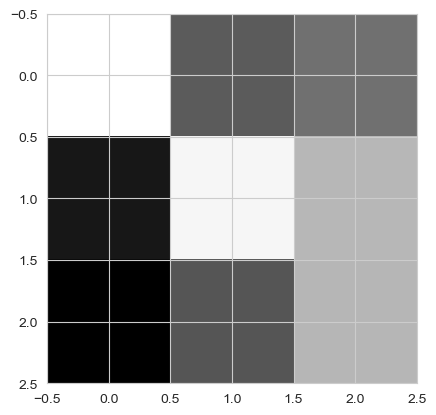

In [61]:
layer_weights = cnn.layers[0].get_weights()[0]
plt.imshow(layer_weights[:, :, 0, 0], cmap='gray')  # Visualizing the filter in the layers
plt.show()

1/1 [==============================] - 0s 32ms/step


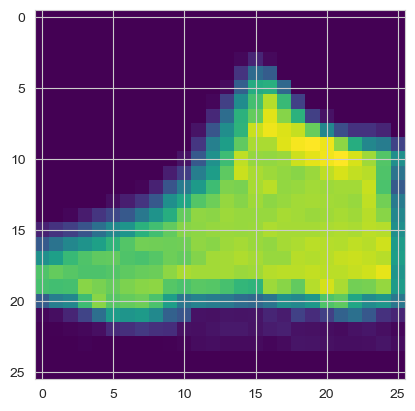

In [87]:
activation_model = tf.keras.models.Model(inputs=cnn.input, outputs=cnn.layers[0].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()

### 2nd CNN model

In [55]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn2.add(BatchNormalization())
cnn2.add(Conv2D(64, (3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D((2, 2)))
cnn2.add(Dropout(0.25))
cnn2.add(Conv2D(64, (3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.25))
cnn2.add(Conv2D(64, (3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

In [56]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [57]:
cnn2.add(Flatten())
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dense(10, activation='softmax'))

In [58]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [59]:
epochs = 10
batch_size = 512

history = cnn2.fit(
    train_features, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(val_features, val_labels)
)

Epoch 1/10
98/98 [==============================] - 58s 571ms/step - loss: 0.6606 - accuracy: 0.7615 - val_loss: 3.2737 - val_accuracy: 0.0999
Epoch 2/10
98/98 [==============================] - 62s 634ms/step - loss: 0.4002 - accuracy: 0.8523 - val_loss: 3.4828 - val_accuracy: 0.2654
Epoch 3/10
98/98 [==============================] - 66s 671ms/step - loss: 0.3327 - accuracy: 0.8786 - val_loss: 4.0381 - val_accuracy: 0.2160
Epoch 4/10
98/98 [==============================] - 61s 627ms/step - loss: 0.3031 - accuracy: 0.8887 - val_loss: 1.9266 - val_accuracy: 0.5572
Epoch 5/10
98/98 [==============================] - 62s 634ms/step - loss: 0.2786 - accuracy: 0.8977 - val_loss: 1.0252 - val_accuracy: 0.6835
Epoch 6/10
98/98 [==============================] - 61s 626ms/step - loss: 0.2580 - accuracy: 0.9056 - val_loss: 0.4568 - val_accuracy: 0.8364
Epoch 7/10
98/98 [==============================] - 62s 635ms/step - loss: 0.2467 - accuracy: 0.9101 - val_loss: 0.2585 - val_accuracy: 0.9073

In [60]:
evaluation = cnn2.evaluate(test_features, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 4s 11ms/step - loss: 0.2082 - accuracy: 0.9261
Test Accuracy : 0.926


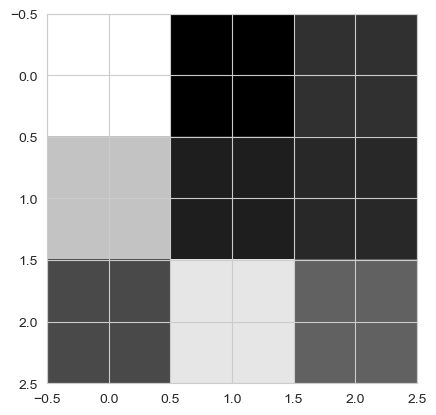

In [82]:
layer_weights = cnn2.layers[2].get_weights()[0]
plt.imshow(layer_weights[:, :, 0, 0], cmap='gray')  # Visualizing the filter in the layer
plt.show()

1/1 [==============================] - 0s 46ms/step


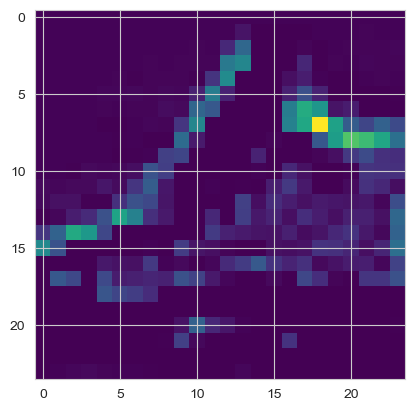

In [83]:
activation_model = tf.keras.models.Model(inputs=cnn2.input, outputs=cnn2.layers[2].output)
sample_image = train_features[420].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Visualizing the feature map of the layers for a sample image
plt.show()